# Exploratory Data Analysis

## Load in standard libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import os
import sweetviz as sv

## Load in our cleaned CSV

In [2]:
vehicles_df = pd.read_csv('../data/processed/data_wrangling.csv')

## Inspect our cleaned dataframe

In [3]:
vehicles_df.shape

(383346, 20)

In [4]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383346 entries, 0 to 383345
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   region          383346 non-null  object 
 1   price           383346 non-null  int64  
 2   year            382236 non-null  float64
 3   manufacturer    367926 non-null  object 
 4   model           378929 non-null  object 
 5   condition       235345 non-null  object 
 6   cylinders       383346 non-null  object 
 7   fuel            383346 non-null  object 
 8   odometer        383346 non-null  float64
 9   title_status    383346 non-null  object 
 10  transmission    383346 non-null  object 
 11  drive           266216 non-null  object 
 12  size            106813 non-null  object 
 13  type            383346 non-null  object 
 14  paint_color     269943 non-null  object 
 15  state           383346 non-null  object 
 16  lat             379938 non-null  float64
 17  long      

In [5]:
vehicles_df.describe()

price           year      odometer            lat  \
count  383346.000000  382236.000000  3.833460e+05  379938.000000   
mean    19064.716173    2011.053271  9.458981e+04      38.552325   
std     15222.626292       9.536492  8.097920e+04       5.855553   
min         3.000000    1900.000000  0.000000e+00     -84.122245   
25%      7495.000000    2008.000000  3.781100e+04      34.720000   
50%     15590.000000    2013.000000  8.700000e+04      39.300000   
75%     27988.000000    2017.000000  1.351690e+05      42.430675   
max    449500.000000    2022.000000  2.915272e+06      82.390818   

                long  age_of_vehicle  
count  379938.000000   382236.000000  
mean      -94.350042       10.946729  
std        18.185386        9.536492  
min      -159.827728        0.000000  
25%      -110.977868        5.000000  
50%       -87.994400        9.000000  
75%       -80.829894       14.000000  
max       173.885502      122.000000

## Reports!

### Let's use the Pandas Profiling package to get a deeper look into our data!

One problem is, our current dataframe is so massive, it will crash the browser if we try to report on all 383,346 lines.  So let's get a sample of an acceptable size.

In [6]:
random_sample = vehicles_df.sample(10000)

In [7]:
profile = ProfileReport(random_sample, title="Vehicles Profiling Report")
profile.to_file("../reports/vehicles_profiling.html")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

There is also another proficling package I encountered, called sweetviz.  Let's give that a try too!

                                             |      | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



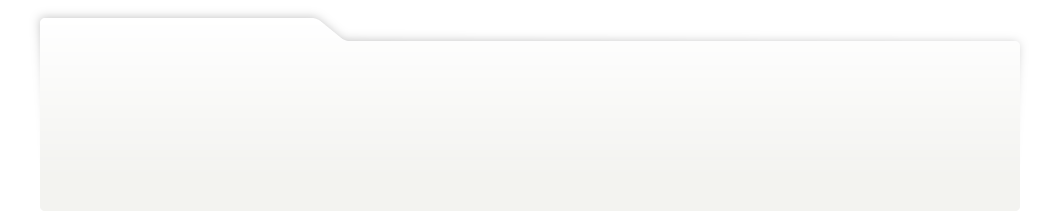
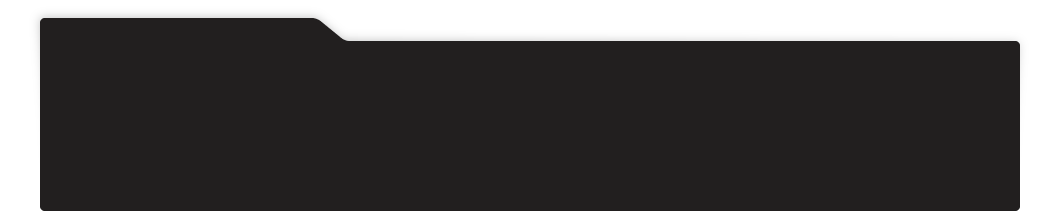
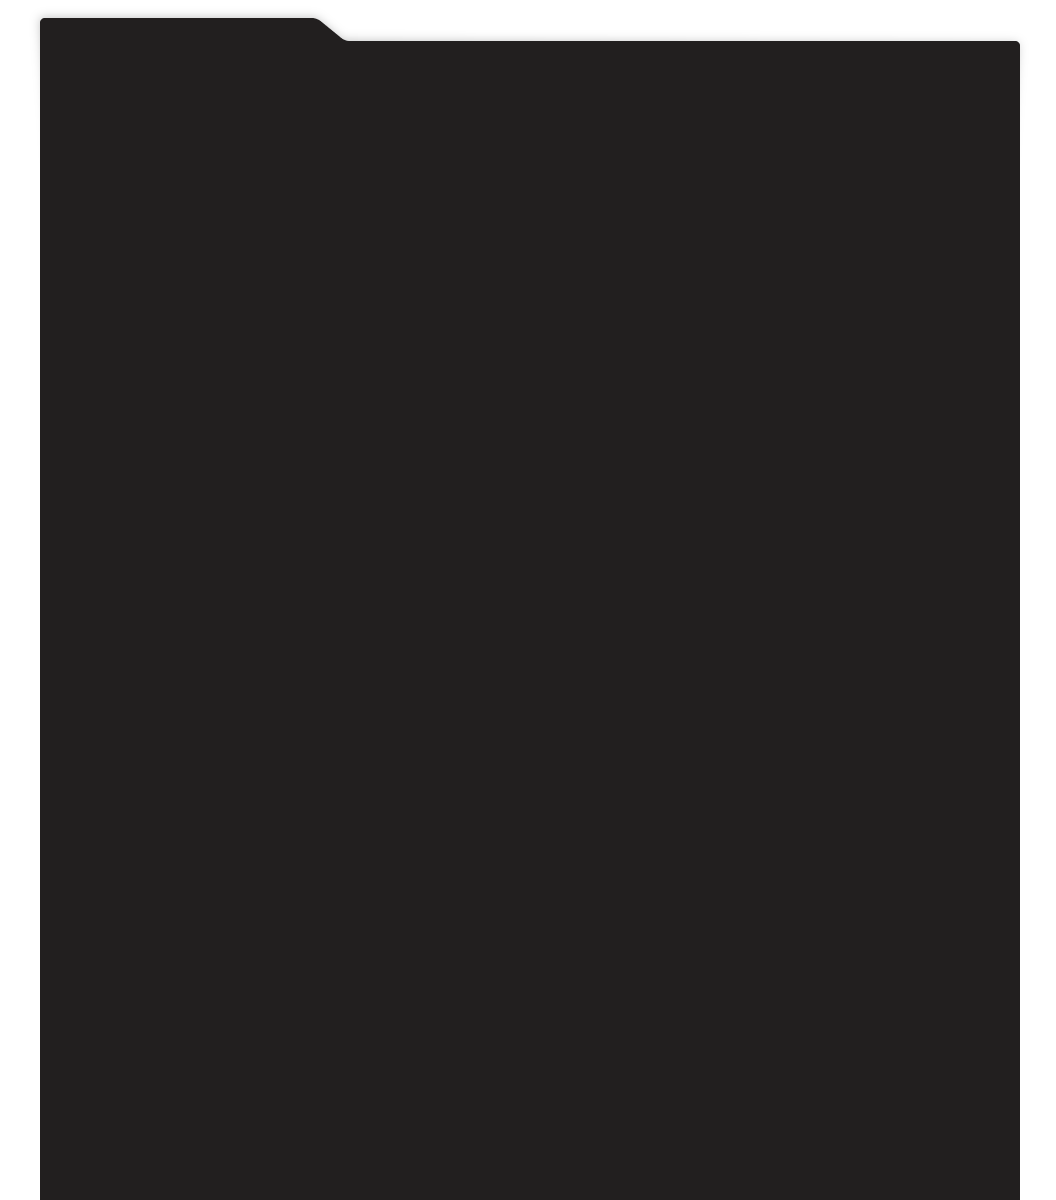
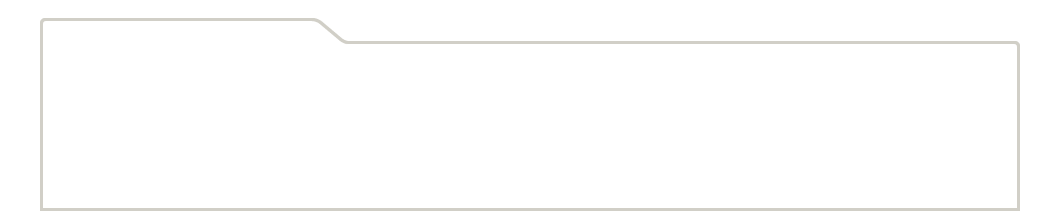
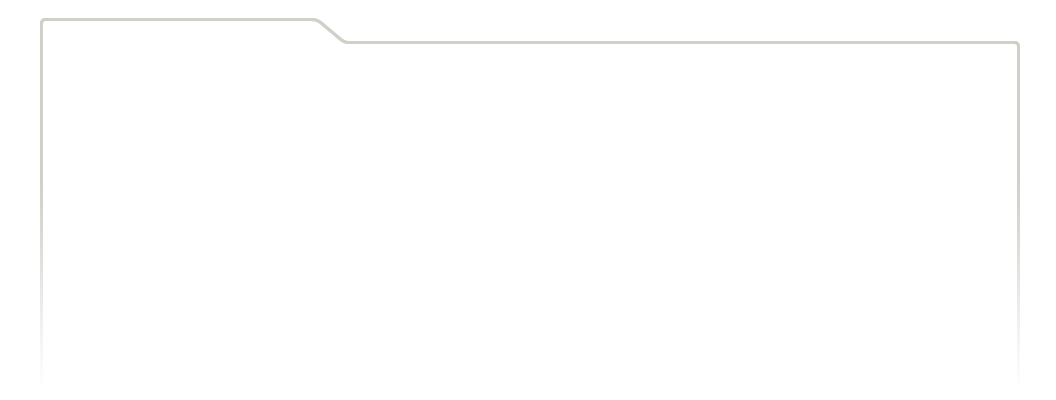
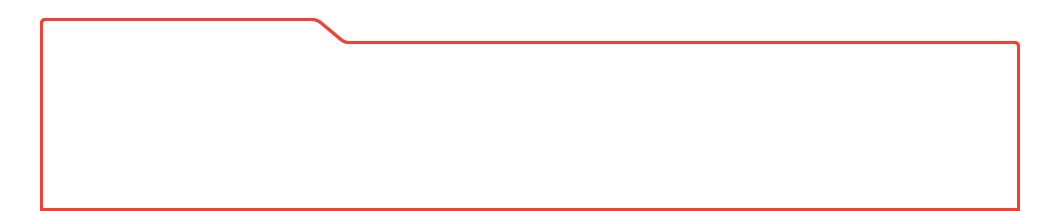
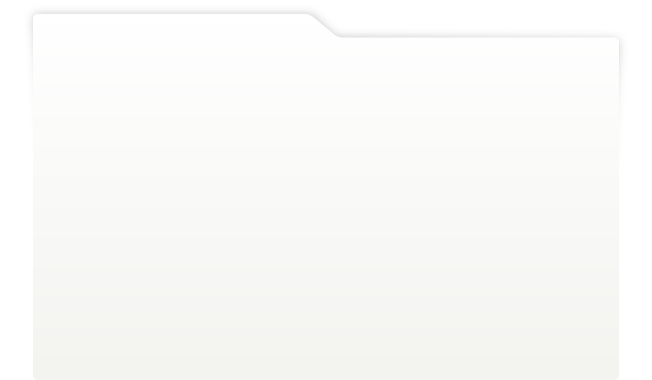
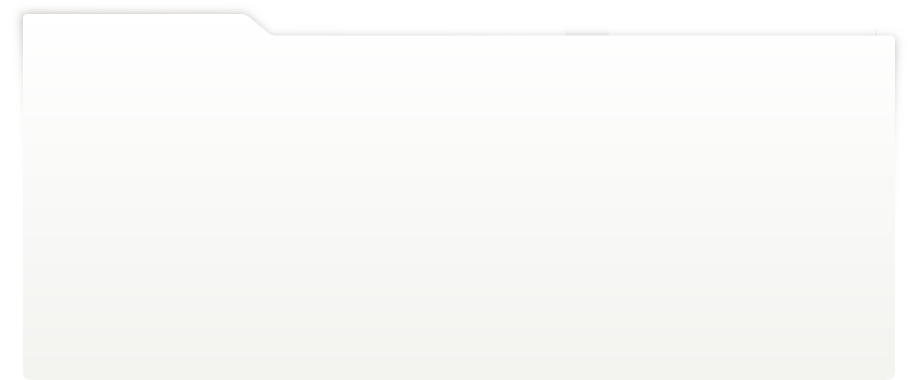
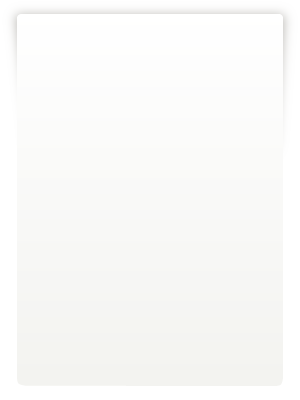
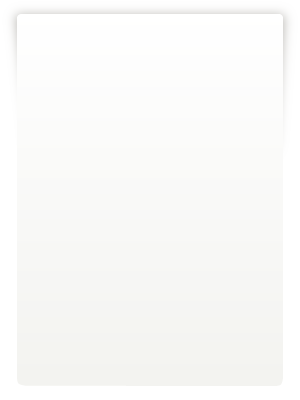
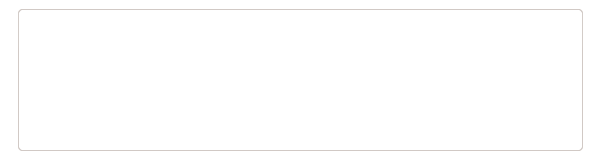
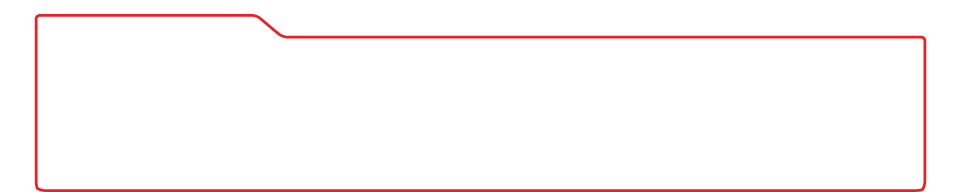
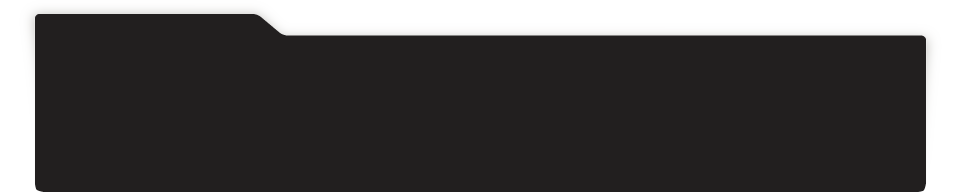
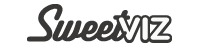
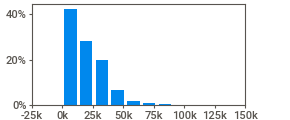
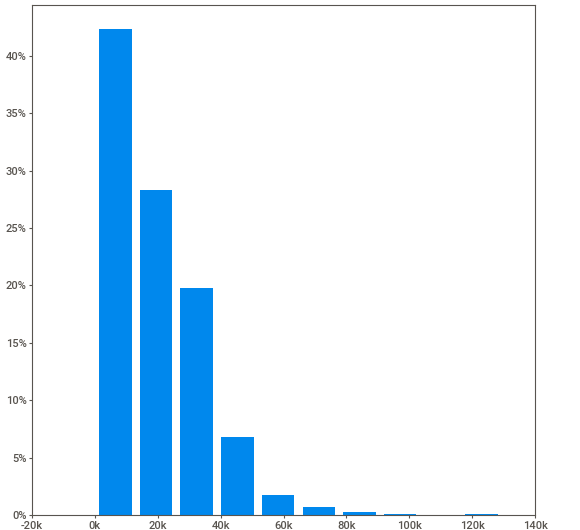
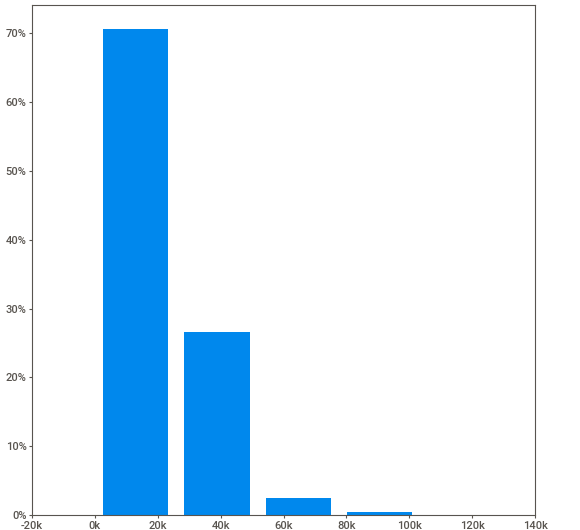
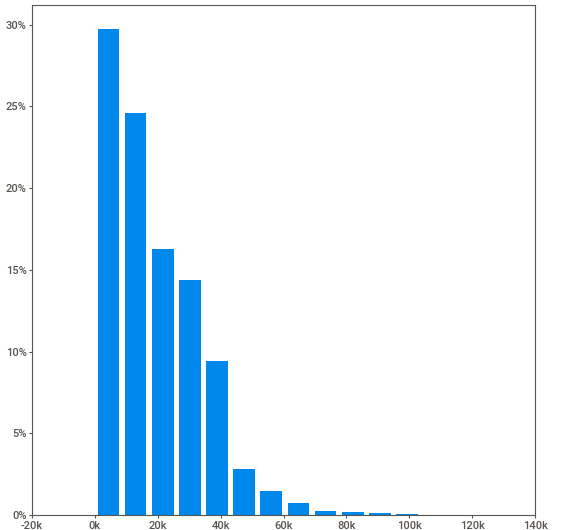
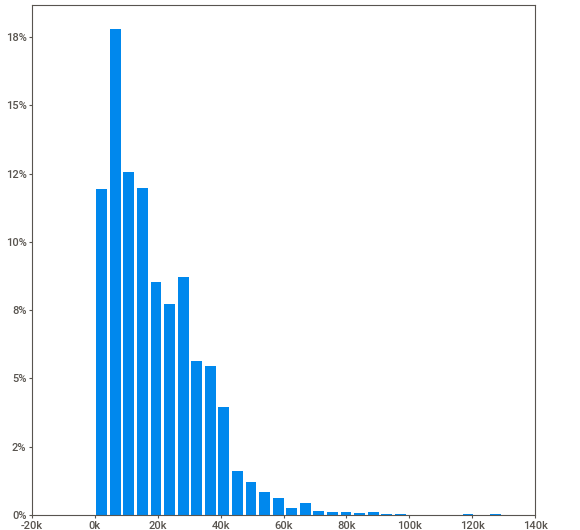
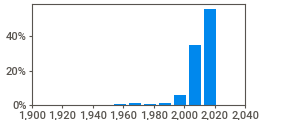
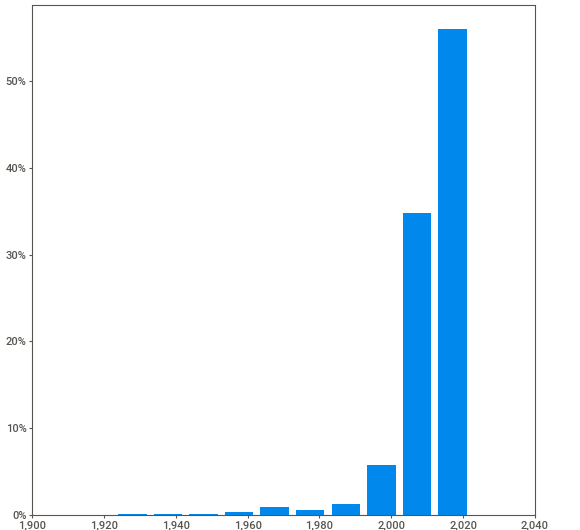
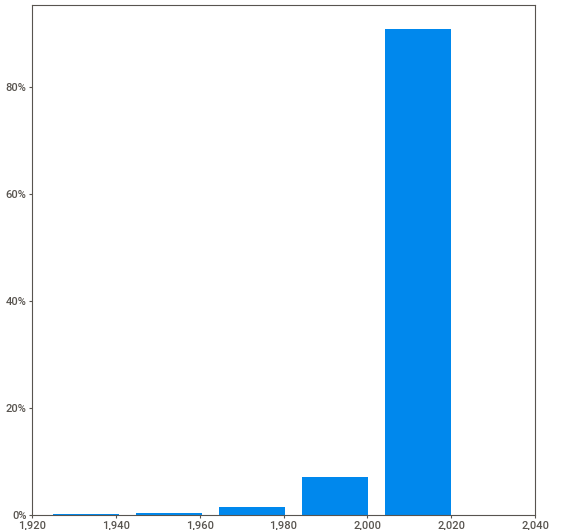
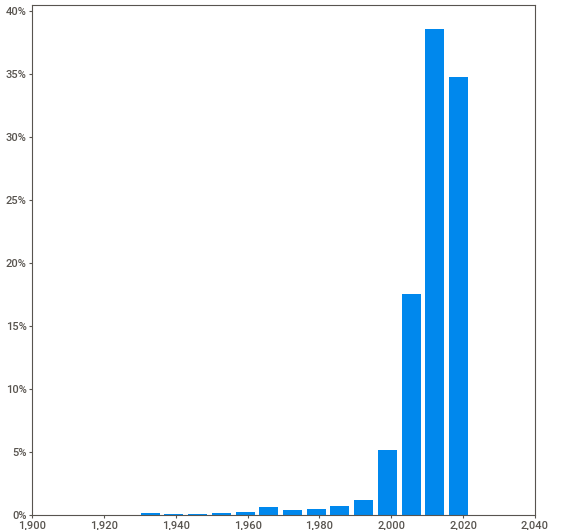
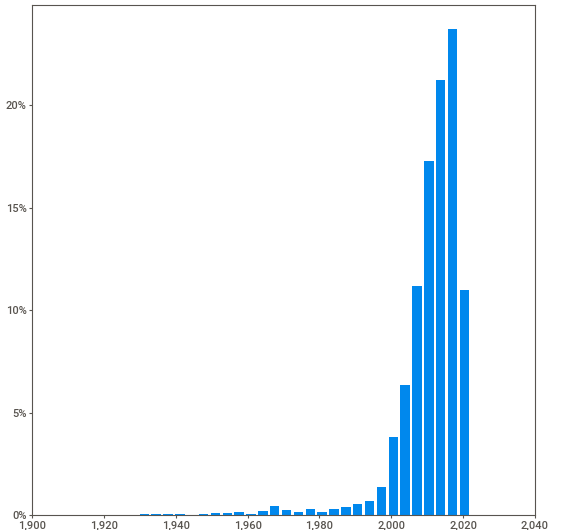
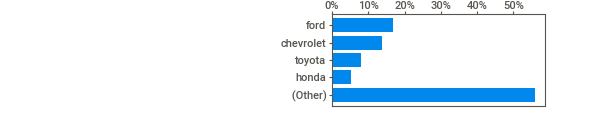
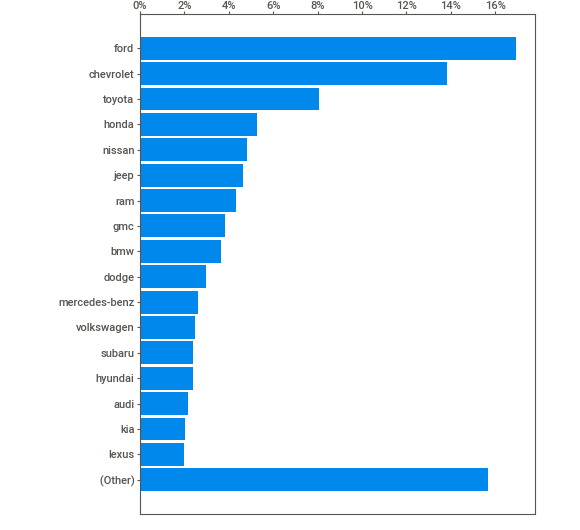
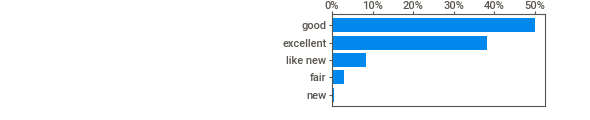
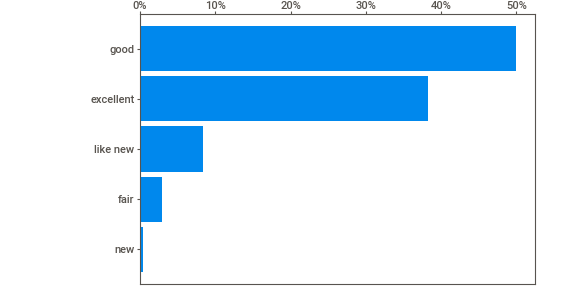
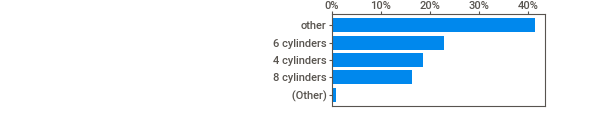
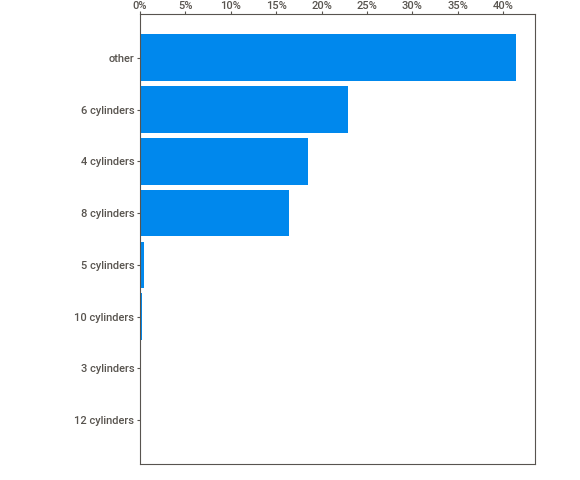
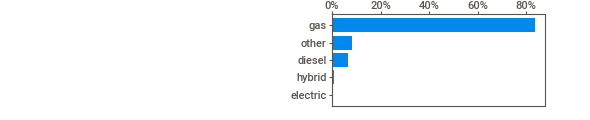
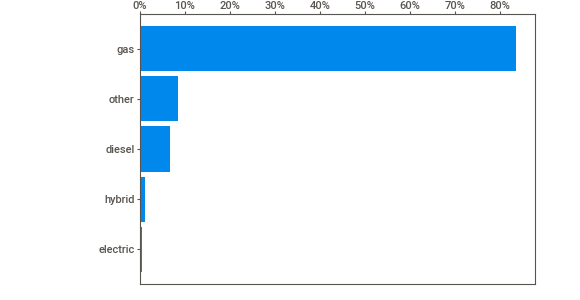
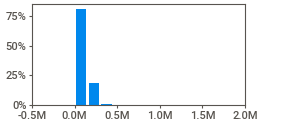
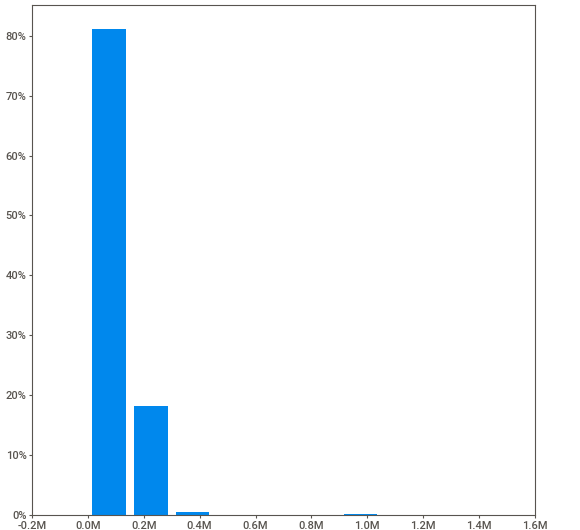
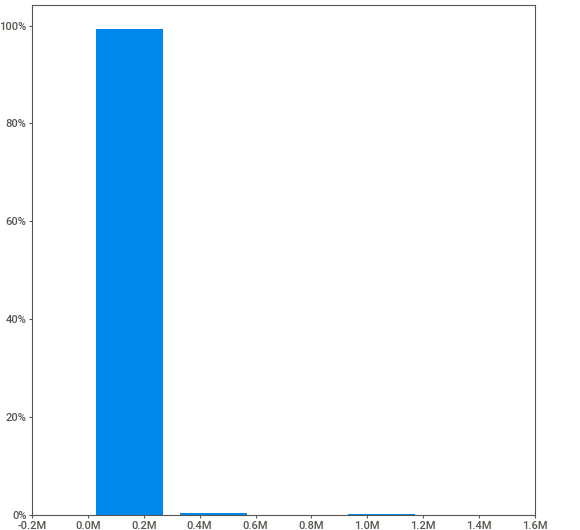
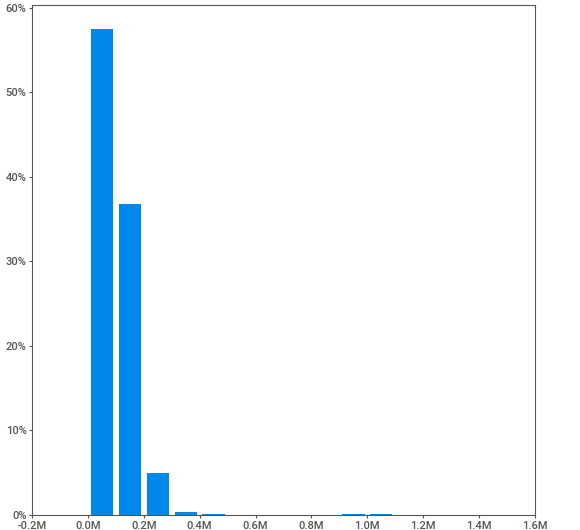
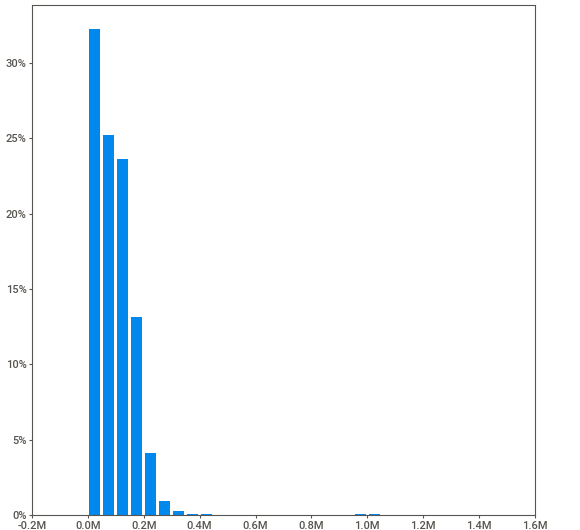
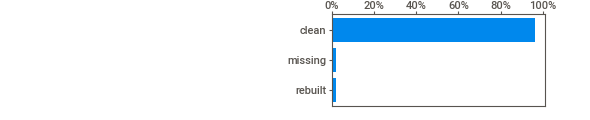
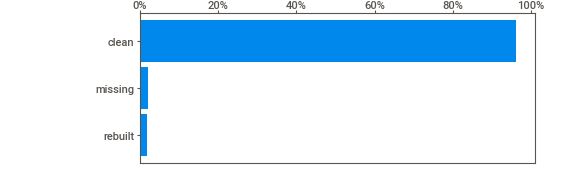
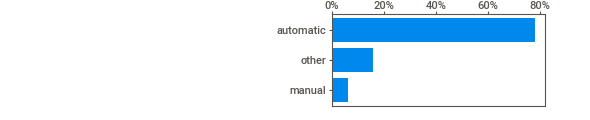
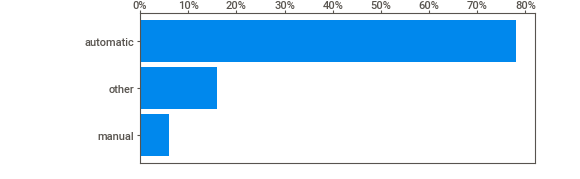
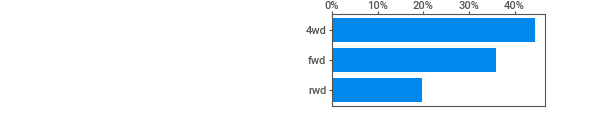
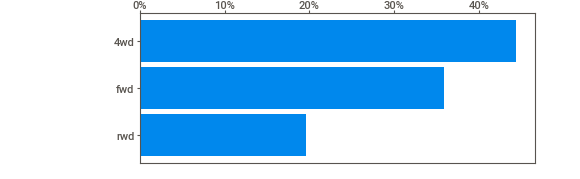
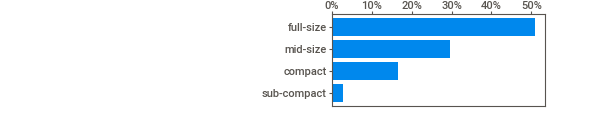
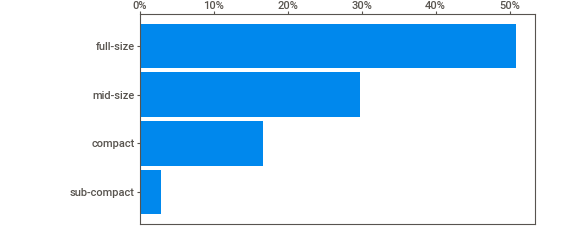
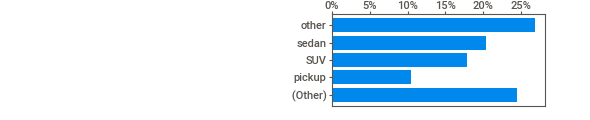
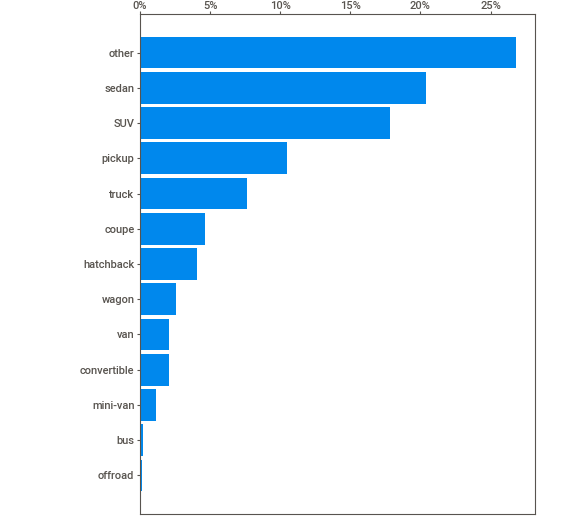
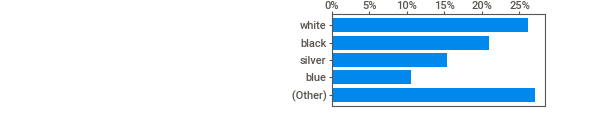
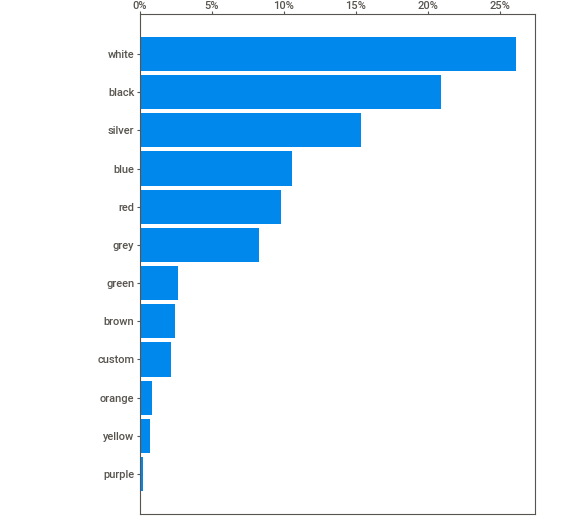
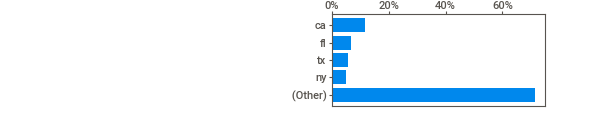
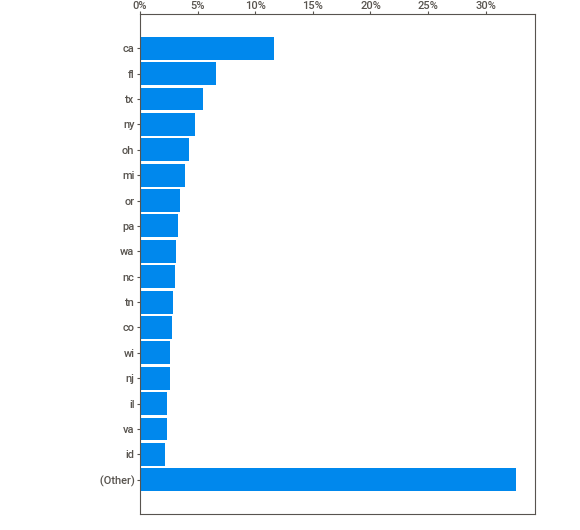
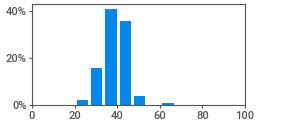
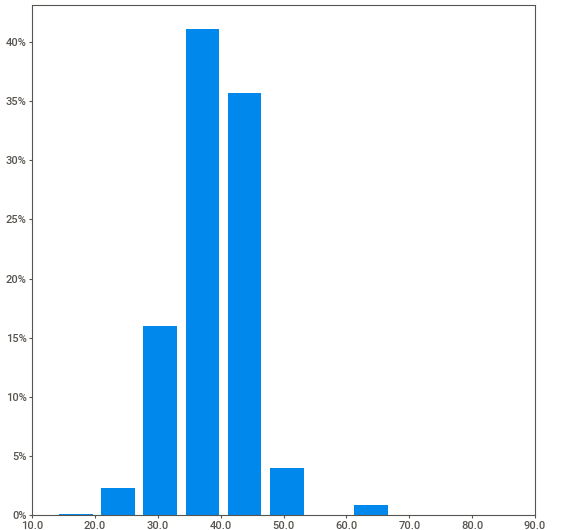
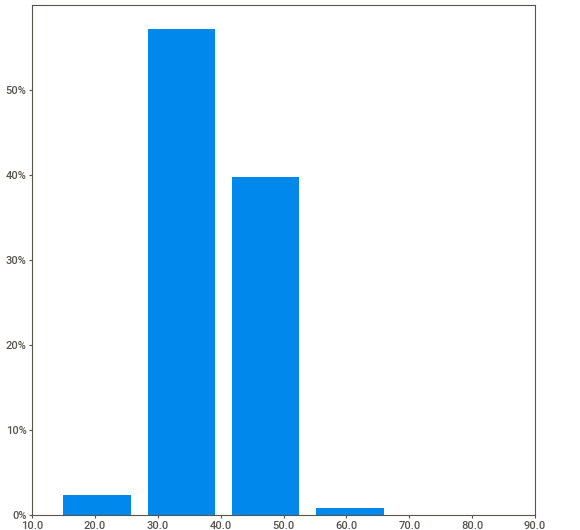
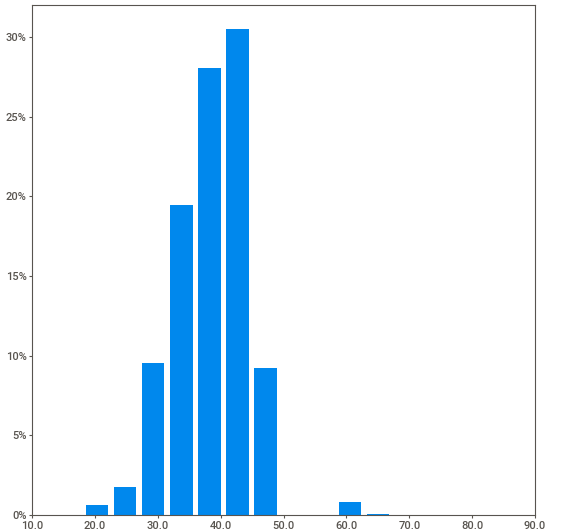
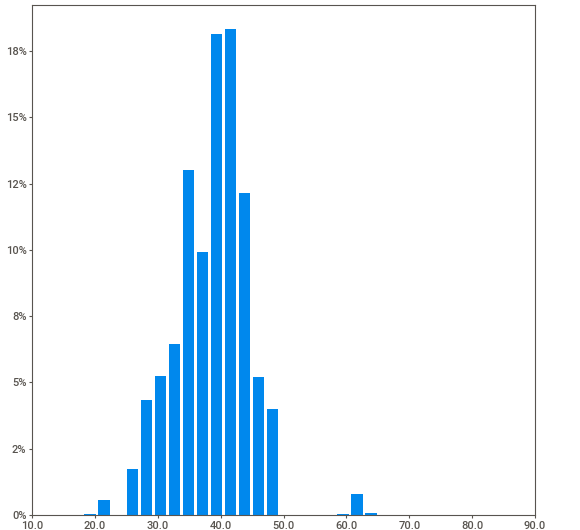
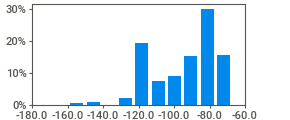
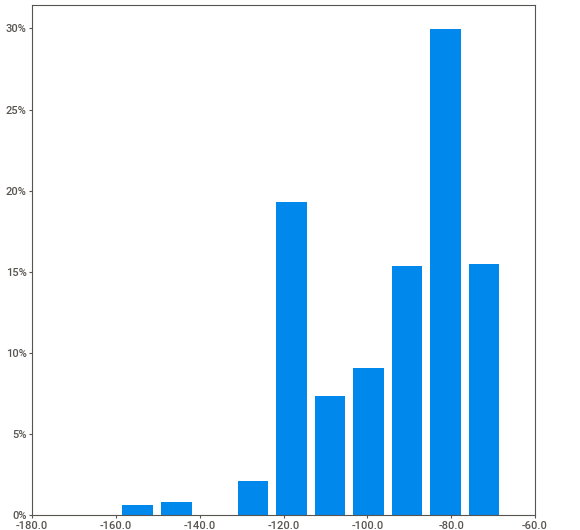
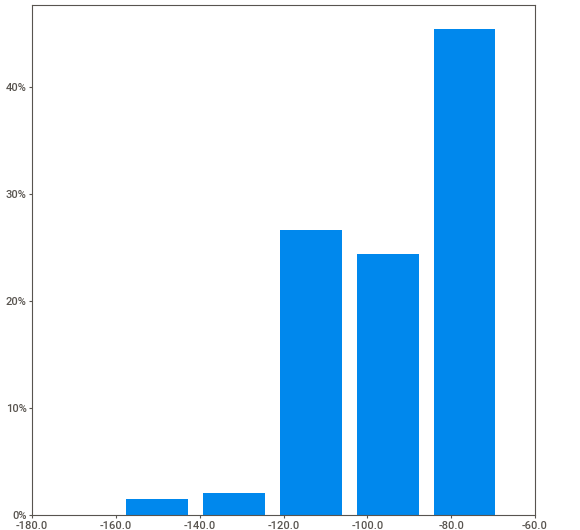
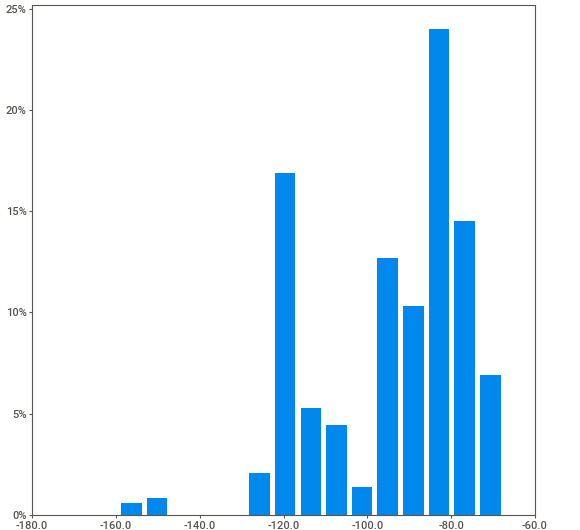
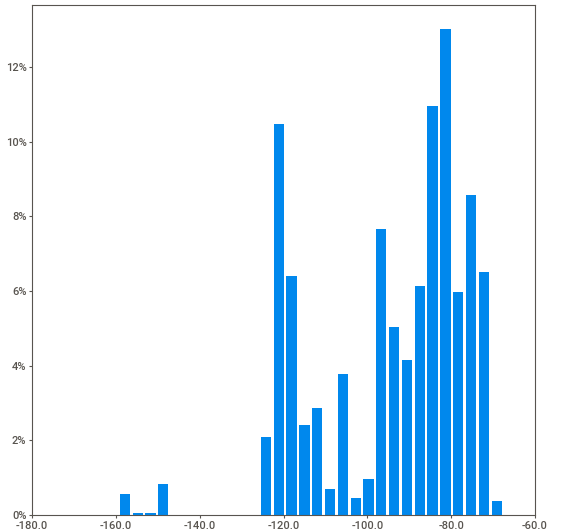
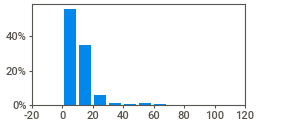
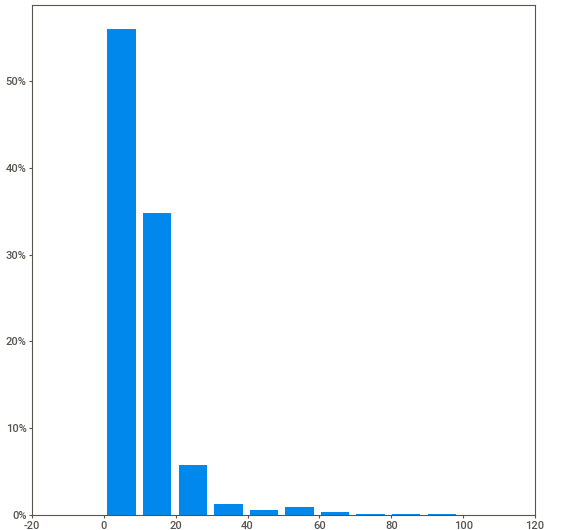
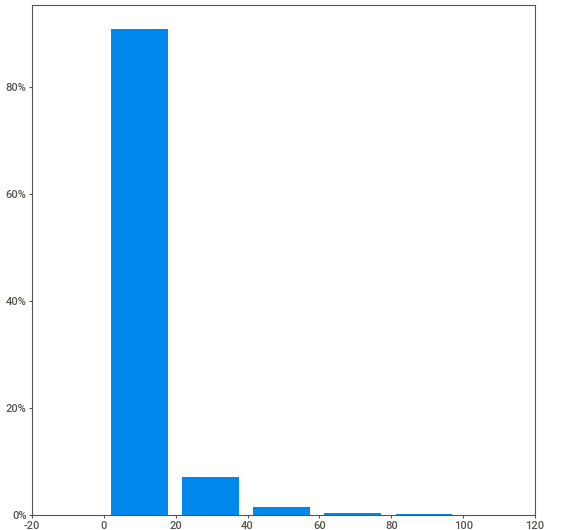
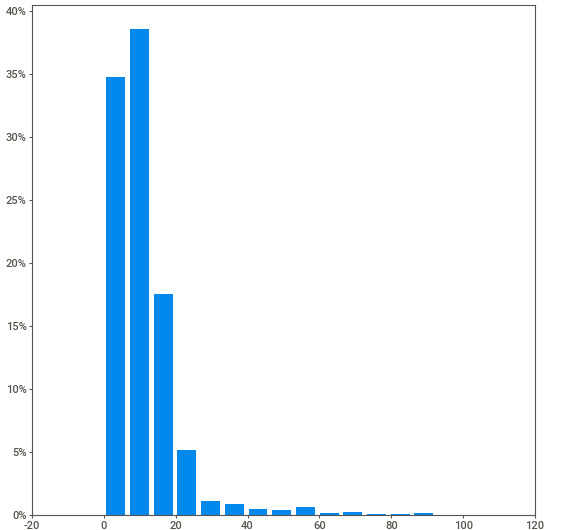
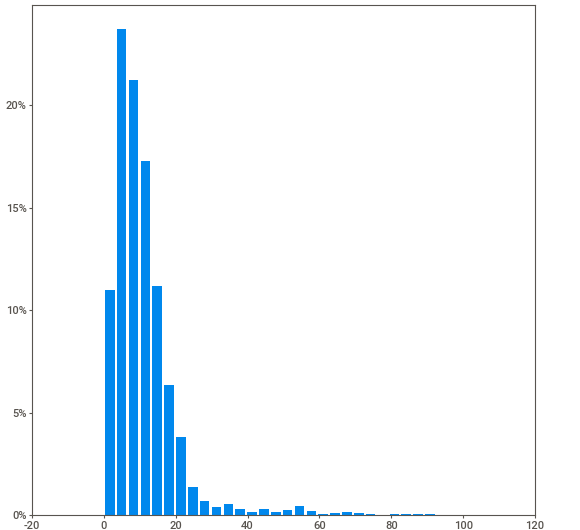
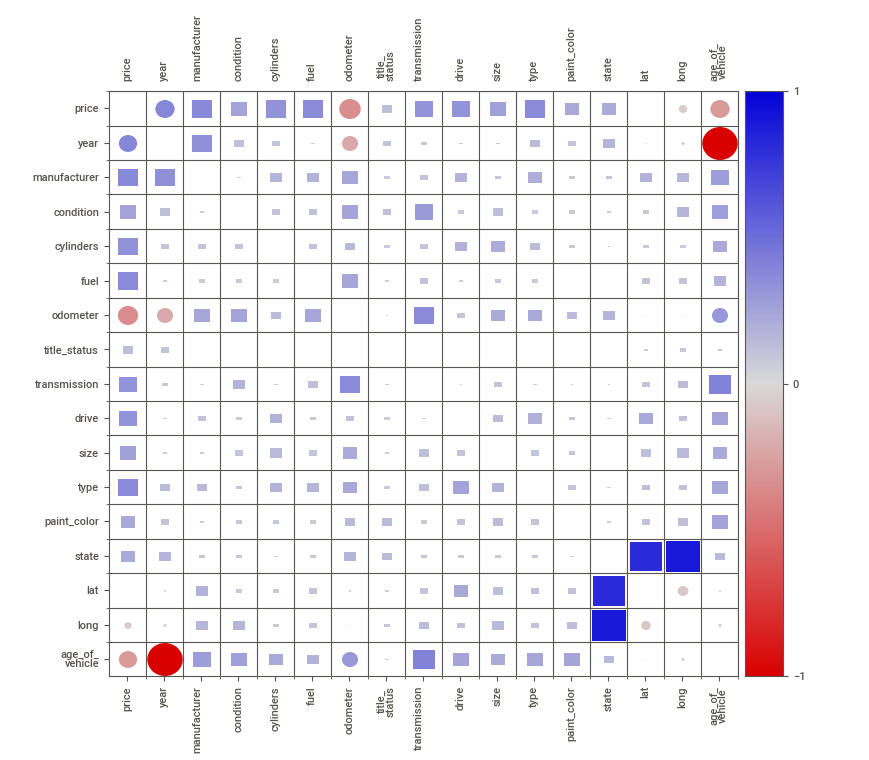
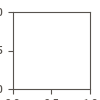

In [8]:
my_report = sv.analyze(random_sample)
my_report.show_html()
my_report.show_notebook(w='100%')

#### A few observations:
- we do not see enough reporting pertaining to categorical data -- it's mostly numerical!
- we have a ton of null values for size, drive, condition and paint_color.  We should fill those in

### Measure price against categorical data!

Let's examine our target variable, price, against codition, to see what sort of effect that has on price!

In [9]:
sns.barplot(data=vehicles_df, x='condition', y='price', estimator=np.median)

<AxesSubplot:xlabel='condition', ylabel='price'>

Interesting how "fair" seems to be a euphemism for not good.  Also intersting how "good" condition cars command a higher price than "like new".  Also, you would expect "excellent" to have a higher price association.

As milage is often associated with the condition of hte vehicle, it would be interesting to see how they are related!

In [10]:
sns.barplot(data=vehicles_df, x='condition', y='odometer', estimator=np.mean)

<AxesSubplot:xlabel='condition', ylabel='odometer'>

### Outliers
It would be nice to get a sense of our outliers.  I think we should measure this against manufacturer, as high-priced cars from a non-luxury manufacturer will surely stand out.  

A boxplot should hep with that!

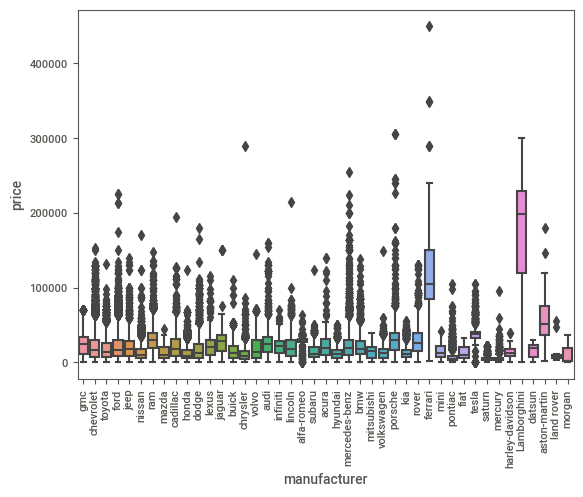

In [11]:
%matplotlib inline
_ = sns.boxplot(x='manufacturer', y='price', data=vehicles_df)
_.set_xticklabels(_.get_xticklabels(),rotation=90)
_ = plt.xlabel('manufacturer')
_ = plt.ylabel('price')
plt.show()

Ooof!  That is a lot!  This is a very large dataset, with an extremely long tail for the price column.

This many outliers should not be a problem, so long as they are not erroneous.  

Also worth noting -- no outliers for Lamborghini!

Let's take a look at that Chrysler outlier

In [12]:
chrysler_outlier_index = vehicles_df.index[
    (vehicles_df['manufacturer'] == 'chrysler') &
    (vehicles_df['price'] > 200000)
]
vehicles_df.iloc[chrysler_outlier_index]

region   price    year manufacturer                   model  \
335451  el paso  290000  2012.0     chrysler  town & country limited   

       condition cylinders fuel  odometer title_status transmission drive  \
335451  like new     other  gas   24000.0        clean    automatic   NaN   

             size type paint_color state      lat      long  \
335451  full-size  van       white    tx  31.7674 -106.4304   

                    posting_date  age_of_vehicle  
335451  2021-04-07T10:20:52-0600            10.0

After investigating, it seems no 2012 Chrysler Town & Country is worth 290,000, so I think we can pop this row out

In [13]:
vehicles_df.drop(chrysler_outlier_index, inplace=True)
vehicles_df[
    (vehicles_df['manufacturer'] == 'chrysler') &
    (vehicles_df['price'] > 200000)
]

Empty DataFrame
Columns: [region, price, year, manufacturer, model, condition, cylinders, fuel, odometer, title_status, transmission, drive, size, type, paint_color, state, lat, long, posting_date, age_of_vehicle]
Index: []

Empty.  Great!

I'm curious as to the correlations of these features.  Let's take a look:

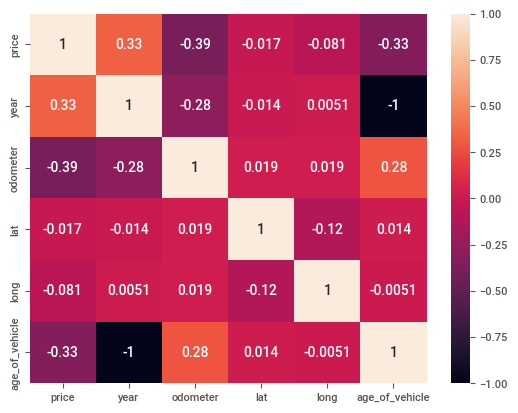

In [14]:
sns.heatmap(vehicles_df.corr(), annot=True);

Understandably, both age of vehicle & odometer are negatively-correlated with price.  Not too many positively-correlated data, aside from age of vehicle, and odometer.  That makes sense!

## Compare numerical data

How might the age of a vehicle affect the corresponding price?

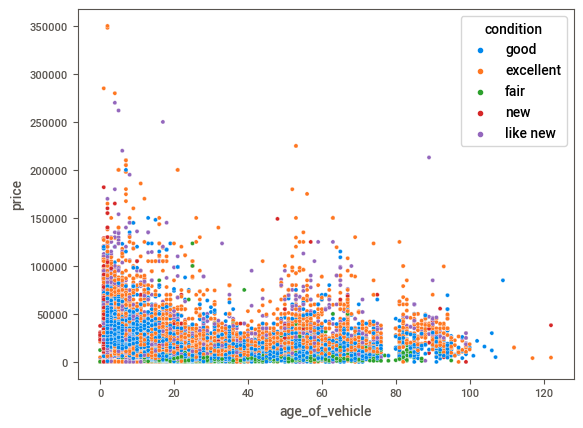

In [15]:
sns.scatterplot(data=vehicles_df, x='age_of_vehicle', y='price', hue='condition')
plt.show()

Almost a straight line against the left pane of this graph!

Check out that gap on the left side of this graph, between about 75 and 80 years.  Why would the price points stop so sharply?  What could account for that?

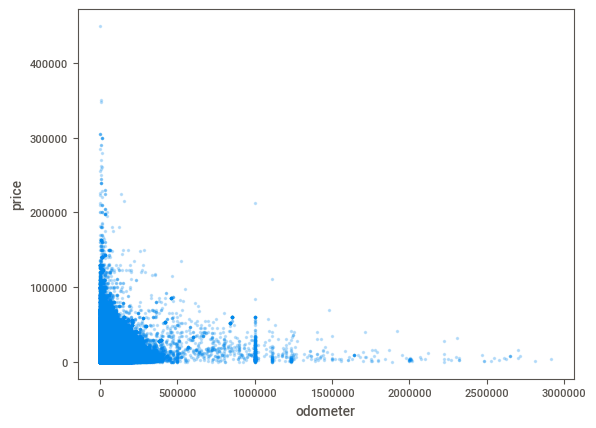

In [16]:
_ = plt.plot(vehicles_df['odometer'], vehicles_df['price'], marker='.', linestyle='none', alpha=0.2)
_ = plt.xlabel('odometer')
_ = plt.ylabel('price')
plt.show()

You can see a fairly thick line where 100K was estimated for odometer

## Price by manufacturer
This should be interesting, since we should be aware of luxury brands, versus more practical brands.  Let's see how they stack up

In [17]:
price_by_manufacturer = vehicles_df.groupby('manufacturer')['price'].median()
price_by_manufacturer.sort_values(ascending=False, inplace=True)
price_by_manufacturer

manufacturer
Lamborghini        197999.0
ferrari            105000.0
aston-martin        52000.0
tesla               37990.0
porsche             29997.0
ram                 29995.0
alfa-romeo          29590.0
jaguar              28990.0
rover               25947.5
audi                24990.0
gmc                 23988.0
infiniti            21590.0
lexus               19995.0
acura               19777.0
mercedes-benz       18999.0
datsun              18700.0
lincoln             18590.0
jeep                18384.0
bmw                 17999.0
cadillac            17500.0
ford                16999.0
chevrolet           15995.0
mitsubishi          15590.0
volvo               14498.0
toyota              13990.0
mini                12995.0
buick               12995.0
volkswagen          11990.0
dodge               11984.5
harley-davidson     11975.0
subaru              11850.0
kia                 11699.5
hyundai             10795.0
fiat                10597.5
nissan              10495.0
mazda  

Not too many surprises there!  I've never heard of a "morgan".  Maybe that's why it's the cheapest?

## Fill in null values for categorical data

There are still many NaN values, especially for categorical columns.  Let's fill those in!

In [18]:
categorical_columns = [
    'region',
    'manufacturer',
    'model',
    'condition',
    'cylinders',
    'fuel',
    'title_status',
    'transmission',
    'drive',
    'size',
    'type',
    'paint_color',
    'state'
];

In [19]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383345 entries, 0 to 383345
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   region          383345 non-null  object 
 1   price           383345 non-null  int64  
 2   year            382235 non-null  float64
 3   manufacturer    367925 non-null  object 
 4   model           378928 non-null  object 
 5   condition       235344 non-null  object 
 6   cylinders       383345 non-null  object 
 7   fuel            383345 non-null  object 
 8   odometer        383345 non-null  float64
 9   title_status    383345 non-null  object 
 10  transmission    383345 non-null  object 
 11  drive           266216 non-null  object 
 12  size            106812 non-null  object 
 13  type            383345 non-null  object 
 14  paint_color     269942 non-null  object 
 15  state           383345 non-null  object 
 16  lat             379937 non-null  float64
 17  long      

In [20]:
vehicles_df[categorical_columns] = vehicles_df[categorical_columns].fillna('other')

In [21]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383345 entries, 0 to 383345
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   region          383345 non-null  object 
 1   price           383345 non-null  int64  
 2   year            382235 non-null  float64
 3   manufacturer    383345 non-null  object 
 4   model           383345 non-null  object 
 5   condition       383345 non-null  object 
 6   cylinders       383345 non-null  object 
 7   fuel            383345 non-null  object 
 8   odometer        383345 non-null  float64
 9   title_status    383345 non-null  object 
 10  transmission    383345 non-null  object 
 11  drive           383345 non-null  object 
 12  size            383345 non-null  object 
 13  type            383345 non-null  object 
 14  paint_color     383345 non-null  object 
 15  state           383345 non-null  object 
 16  lat             379937 non-null  float64
 17  long      

Great!  categorical values have been filled in.  There still nans for age of vehicle and lat/lng values.  I think those are OK for now.

## Export the Dataframe

In [22]:
datapath = '../data/processed'
os.makedirs(datapath, exist_ok=True)  
vehicles_df.to_csv(f'{datapath}/exploratory_data_analysis.csv', index=False)  